<a href="https://colab.research.google.com/github/neossi080/deep/blob/main/xavier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Populating the interactive namespace from numpy and matplotlib
Shape of the image (2800,)


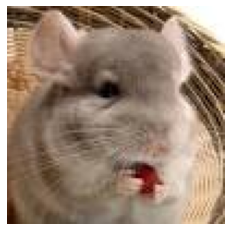

Shape of the image (4492,)


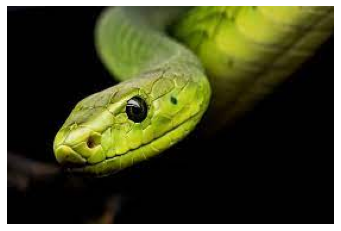

In [2]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

%pylab inline

url_rongeur = r'https://github.com/neossi080/deep/blob/main/1672839759189.jpeg?raw=true'
resp = requests.get(url_rongeur, stream=True).raw
image_array_rongeur = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_rongeur.shape}')
image_rongeur = cv2.imdecode(image_array_rongeur, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_rongeur, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()

url_serpent = r'https://github.com/neossi080/deep/blob/main/1672837500606.jpeg?raw=true'
resp = requests.get(url_serpent, stream=True).raw
image_array_serpent = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_serpent.shape}')
image_serpent = cv2.imdecode(image_array_serpent, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_serpent, cv2.COLOR_BGR2RGB))
plt.show()

(40, 40, 3)
(40, 40)
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  000  000  000  000  255  255  255  255  255  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  255  255  255  255  255  255  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  255  255  255  255  255  255  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  255  255  255  255  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  255  255  255  255  255  255  000  000  

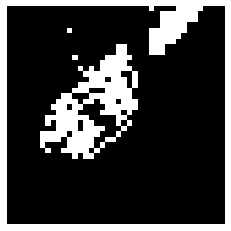

In [4]:
res = cv2.resize(image_serpent , dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
#

In [5]:

#Import dataset
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/neossi080/deep/blob/main/dataset.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/dataset')
print(data_dir)
print(os.path.abspath(data_dir))

2543421/2543421 [==============================] - 0s 0us/step
/content/datasets/dataset
/content/datasets/dataset


In [6]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

118


In [26]:


batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)
     


Found 118 files belonging to 2 classes.
Using 83 files for training.
Found 118 files belonging to 2 classes.
Using 35 files for validation.
['rongeur europeen - Recherche Google', 'serpent cobra – Recherche Google']


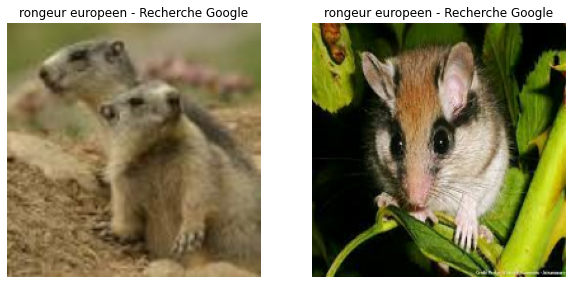

In [28]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(2):
    ax = plt.subplot(1, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
    train_data,
  validation_data=val_data,
  epochs=5,
  callbacks=[tensorboard_callback]
)

Epoch 1/5
26/26 [==============================] - 1s 34ms/step - loss: 0.7048 - accuracy: 0.5325 - val_loss: 0.6985 - val_accuracy: 0.4340
Epoch 2/5
26/26 [==============================] - 1s 26ms/step - loss: 0.6900 - accuracy: 0.5455 - val_loss: 0.6983 - val_accuracy: 0.4340
Epoch 3/5
26/26 [==============================] - 1s 25ms/step - loss: 0.6823 - accuracy: 0.5844 - val_loss: 0.7624 - val_accuracy: 0.4340
Epoch 4/5
26/26 [==============================] - 1s 25ms/step - loss: 0.6991 - accuracy: 0.5455 - val_loss: 0.6995 - val_accuracy: 0.4340
Epoch 5/5
26/26 [==============================] - 1s 41ms/step - loss: 0.6586 - accuracy: 0.6234 - val_loss: 0.7186 - val_accuracy: 0.4906


Saving 1672839759190.jpeg to 1672839759190 (1).jpeg


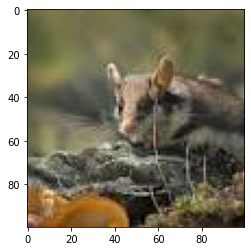

1/1 [==============================] - 0s 16ms/step
[0]
1/1 [==============================] - 0s 16ms/step
[[0.53745013 0.46254987]]


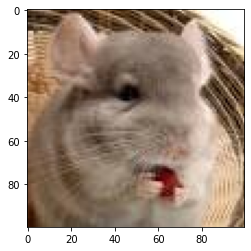

c'est un rongeur !


In [33]:

from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    res = np.argmax(model.predict(img_to_predict), axis=-1)
    print(np.argmax(model.predict(img_to_predict), axis=-1))
    print(model.predict(img_to_predict))
    if res == 1:
        plt.imshow(cv2.cvtColor(image_serpent, cv2.COLOR_BGR2RGB))
        plt.show()
        print("c'est un serpent !")
    elif res == 0 :
        plt.imshow(cv2.cvtColor(image_rongeur, cv2.COLOR_BGR2RGB))
        plt.show()
        print("c'est un rongeur !")
     
